Objecctive: In this dataset we are required to predict consultation fee of doctors based on various parameters namely:
        Qualification
        Experience
        Rating
        Place
        Profile
        Miscellaneous information

IMPORTING NECESSARY MODULES AND DATASET For analysis

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [46]:
test_data=pd.read_excel('finaldctest.xlsx')

In [47]:
train_data=pd.read_excel('finaldctrain.xlsx')

In [48]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [49]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [50]:
train_data.shape,test_data.shape

((5961, 7), (1987, 6))

UNDERSTANDING THE COLUMNS

In [51]:
train_data.shape

(5961, 7)

In [52]:
train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [53]:
test_data.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

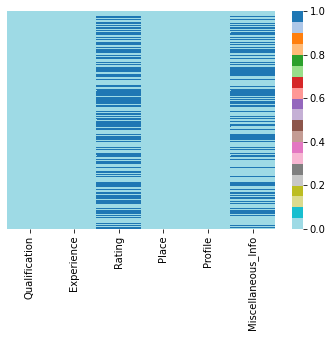

In [54]:
sns.heatmap(test_data.isnull(),yticklabels=False,cmap='tab20_r')

In [55]:
train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

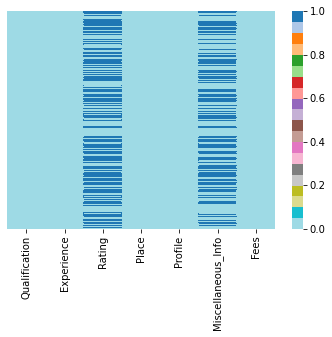

In [56]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap='tab20_r')

we could undertsand Rating,Place and Miscellaneous coluumns have null data we will trest th null values whil cleaning th data

In [57]:
train_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

1.We have observed all the columns are object type,hence we should analyse and convert it into integer type
2.we can find null or Nan values in Rating and Miscellaneous_info columns

In [58]:
test_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

since all the columns are in oject type, we can look into each column in details below

In [59]:
for column in train_data.columns:
    if train_data[column].dtypes==object:
        print(str(column)+':'+str(train_data[column].unique()))
        print('..........................................')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
..........................................


Experience:['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experience' '40 years ex

In [60]:
for column in test_data.columns:
    if test_data[column].dtypes==object:
        print(str(column)+':'+str(test_data[column].unique()))
        print('..........................................')
        print('\n')

Qualification:['MBBS' 'MBBS, Diploma in Otorhinolaryngology (DLO)' 'MBBS, DDVL' 'BAMS'
 'BDS, MDS - Conservative Dentistry & Endodontics' 'BDS, MDS'
 'BDS, MDS - Pedodontics'
 'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA'
 'BHMS' 'BDS' 'MBBS, FCD - Diabetology' 'MBBS, DDV'
 'MBBS, MD - Dermatology' 'MS - ENT'
 'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)'
 'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology'
 'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)'
 'BDS, MDS - Periodontics' 'BDS, MDS- Oral Pathology'
 'MBBS, MD - General Medicine' 'MS - ENT, MBBS'
 'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT'
 'MBBS, MS - ENT, DNB - Otorhinolaryngology'
 'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics'
 'BSc, LCEH' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, DGO, MD - Obstetrics & Gynaecology' 'BHMS, MD - Hom

we found all the columns other than fees is object or string datatype,we shall analyse and modify each column and convert it accordingly


RATING

In [61]:
train_data['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [62]:
test_data['Rating'].unique()

array([nan, '70%', '100%', '90%', '94%', '99%', '98%', '87%', '64%',
       '96%', '95%', '97%', '93%', '69%', '71%', '83%', '92%', '80%',
       '86%', '88%', '67%', '85%', '84%', '55%', '89%', '82%', '81%',
       '60%', '73%', '65%', '77%', '91%', '78%', '79%', '76%', '52%',
       '53%'], dtype=object)

In [63]:
train_data['Rating'].fillna('0%',inplace=True)
test_data['Rating'].fillna('0%',inplace=True)

for i in train_data['Rating'].value_counts().index:
    train_data['Rating'].replace(i,int(i[:-1]),inplace=True)
    
for i in test_data['Rating'].value_counts().index:
    test_data['Rating'].replace(i,int(i[:-1]),inplace=True)
    
    
train_data['Rating'] = train_data['Rating'].astype(int)
test_data['Rating'] = test_data['Rating'].astype(int)


as Rating column is has nan and the % format,we are removing % symbol and replacing nan values with 0,since mean,median or mode wouldnt be logically right approach to rate a doctor's service

In [64]:
test_data['Rating'].isnull().sum()

0

In [65]:
train_data['Rating'].isnull().sum()

0

In [66]:
train_data['Rating'].unique()

array([100,  98,   0,  99,  79,  95,  97,  94,  88,  90,  80,  93,  36,
        78,  87,  96,  82,  89,  74,  86,  92,  83,  76,  85,  56,  91,
        68,  60,  75,  69,  73,  67,  77,  33,  55,  71,  84,  45,  63,
        72,  81,  62,  57,   7,  48,  40,  70,  64,  65,  47,  58,  53])

In [67]:
test_data['Rating'].unique()

array([  0,  70, 100,  90,  94,  99,  98,  87,  64,  96,  95,  97,  93,
        69,  71,  83,  92,  80,  86,  88,  67,  85,  84,  55,  89,  82,
        81,  60,  73,  65,  77,  91,  78,  79,  76,  52,  53])

In [68]:
test_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

we have croos checked after making necessary changes

EXPERIENCE

In [69]:
train_data['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [70]:
test_data['Experience'].unique()

array(['35 years experience', '31 years experience',
       '40 years experience', '0 years experience', '16 years experience',
       '14 years experience', '23 years experience', '9 years experience',
       '11 years experience', '44 years experience', '4 years experience',
       '34 years experience', '13 years experience',
       '28 years experience', '6 years experience', '32 years experience',
       '3 years experience', '8 years experience', '43 years experience',
       '27 years experience', '22 years experience',
       '25 years experience', '36 years experience',
       '17 years experience', '20 years experience',
       '18 years experience', '29 years experience', '5 years experience',
       '19 years experience', '10 years experience', '2 years experience',
       '30 years experience', '24 years experience',
       '26 years experience', '41 years experience',
       '46 years experience', '21 years experience',
       '12 years experience', '45 years experience',

In [71]:
train_data['Experience'] = train_data['Experience'].str.split().str[0]
train_data['Experience'] = train_data['Experience'].astype(int)

In [72]:
test_data['Experience'] = test_data['Experience'].str.split().str[0]
test_data['Experience'] = test_data['Experience'].astype(int)

in experience column we found that the words 'years experience' has to be removed to get actual years of experience in number to make analysis

In [73]:
train_data['Experience'].unique()

array([24, 12,  9, 20,  8, 42, 10, 14, 23,  5,  7, 21, 19, 41, 31, 25, 16,
       15, 11, 22, 38,  6, 36, 13, 18, 46, 40, 49, 33,  0, 27, 30, 52, 60,
       26, 35, 34, 39, 32, 17, 28, 58,  4, 45, 44,  3, 37, 50, 29, 43, 54,
       66,  2, 51, 47, 48, 53, 56, 61, 59, 57, 55, 65, 64])

In [74]:
test_data['Experience']

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: int32

MISCELLANEOUS_INFO

Miscellaneous_Info explains us the feedback,location and number of feedbacks,which is already repeated in place,ratings columns hence we can drop miscellaneous column

while looking into profile column the data is neat and onehot encoding is sufficient for categorising the same

PLACE & CITY

In [75]:
train_data["Place"].fillna("Unknown,Unknown",inplace=True)

In [76]:
test_data["Place"].fillna("Unknown,Unknown",inplace=True)

In [77]:
train_data["area"] = train_data["Place"].str.rsplit(',',1).str.get(0)
train_data["City"] = train_data["Place"].str.rsplit(',',1).str.get(1)

train_data["City"]=train_data["City"].str.strip()

In [78]:
test_data["area"] = test_data["Place"].str.rsplit(',',1).str.get(0)
test_data["City"] = test_data["Place"].str.rsplit(',',1).str.get(1)

test_data["City"]=test_data["City"].str.strip()

1.we removed nan values wih unkown
2.we have area and city in the same column we are splitting it last word of the address as city and remaining as area name 

In [79]:
test_data["area"]

0         Ghatkopar East
1       West Marredpally
2               KK Nagar
3        New Ashok Nagar
4         Kanakpura Road
              ...       
1982        Basavanagudi
1983             Choolai
1984               Porur
1985             Arekere
1986        Pallikaranai
Name: area, Length: 1987, dtype: object

In [80]:
train_data["area"]

0                     Kakkanad
1                   Whitefield
2              Mathikere - BEL
3            Bannerghatta Road
4                 Keelkattalai
                 ...          
5956              Basavanagudi
5957              Nungambakkam
5958    Greater Kailash Part 2
5959            Vileparle West
5960                 Pitampura
Name: area, Length: 5961, dtype: object

In [81]:
test_data["City"]

0          Mumbai
1       Hyderabad
2         Chennai
3           Delhi
4       Bangalore
          ...    
1982    Bangalore
1983      Chennai
1984      Chennai
1985    Bangalore
1986      Chennai
Name: City, Length: 1987, dtype: object

In [82]:
train_data["City"].isnull().sum()

1

In [83]:
train_data["City"]=train_data["City"].fillna('None')

In [84]:
test_data["City"].isnull().sum()

0

In [85]:
train_data.drop('Place',1,inplace=True)
test_data.drop('Place',1,inplace=True)

In [86]:
train_data.dtypes

Qualification         object
Experience             int32
Rating                 int32
Profile               object
Miscellaneous_Info    object
Fees                   int64
area                  object
City                  object
dtype: object

we are splitting the columns from the last element of the list,after splitting one part gives information about the area and last element gives information about the city

QUALIFICATION

the top qualifications are selected by majority of doctors holding same qualification 

In [87]:
train_data['Qualification'].value_counts()[:30]


BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

BDS,BHMS,BAMS,MD,MBBS,Fellowship,DLO,MLO,DNB,DDVL,MS  , these qualifications are present in a very high number. 
So, we are going to add features of those and add values '1' or '0' as if they are present or not.

as qualification column has more than one information and e have many niwue items we are splitting qualificaion with first word which tells us about the doctor's degree  and sorted with most common 10 qualifications

In [88]:
train_data['Qualification'] = train_data['Qualification'].str.split(",")
Qualification = {}

for x in train_data['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:
            Qualification[qual] += 1
        else:
            Qualification[qual] = 1

In [89]:
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [90]:
for qual in final_qual:
    train_data[qual] = 0
    
for x,y in zip(train_data['Qualification'].values, np.array([i for i in range(len(train_data))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            train_data[c][y] = 1

In [91]:
train_data.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [92]:
train_data.drop(['Qualification'],axis=1, inplace=True)


Exploratory Data Analysis

UNIVARIATE ANALYSIS

In [93]:
train_data.columns

Index(['Experience', 'Rating', 'Profile', 'Miscellaneous_Info', 'Fees', 'area',
       'City', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT',
       'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

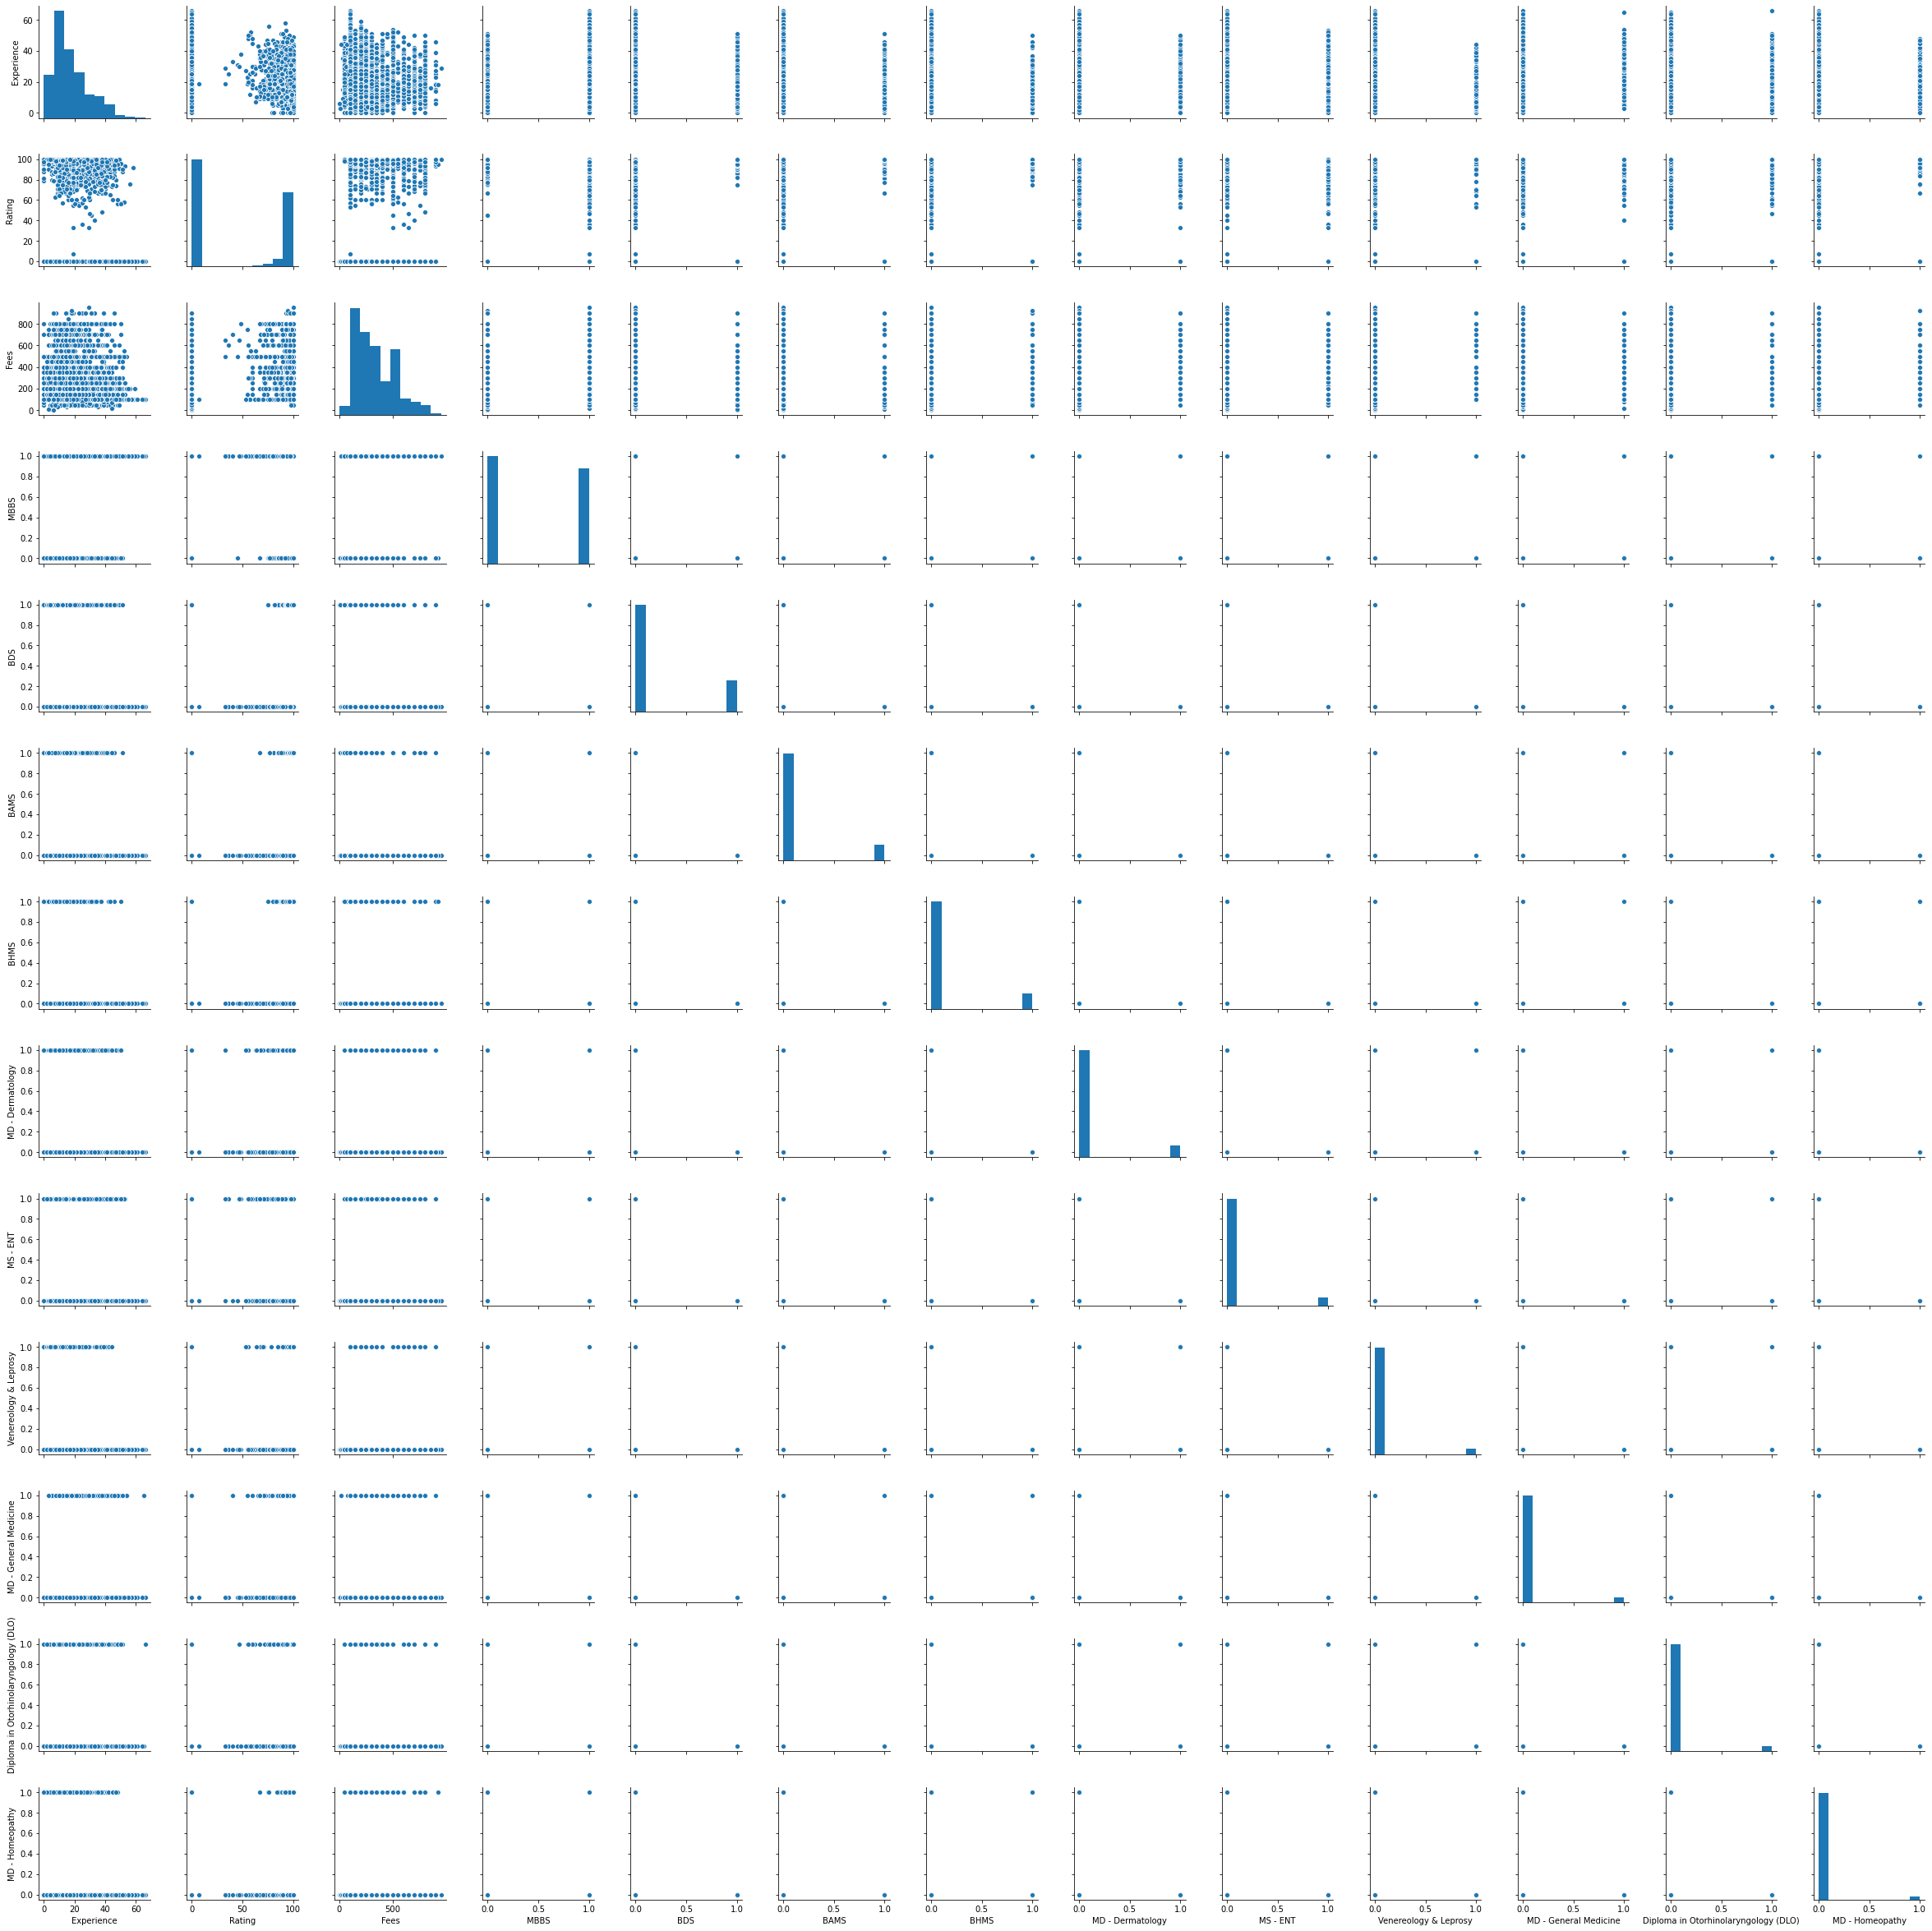

In [94]:
sns.pairplot(train_data)

UNIVARIATE ANALYSIS

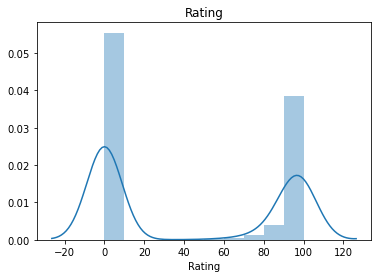

In [95]:
sns.distplot(train_data["Rating"])
plt.title("Rating")
plt.show()

we can understand most of the data is either in 0 rating or 100 very few data has rating between 60 to 90

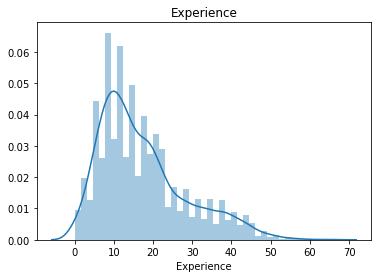

In [96]:
sns.distplot(train_data["Experience"])
plt.title("Experience")
plt.show()

most of the doctors hold betweeb 5-10 years of experience and data is not normally distributed

In [97]:
train_data.columns

Index(['Experience', 'Rating', 'Profile', 'Miscellaneous_Info', 'Fees', 'area',
       'City', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT',
       'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

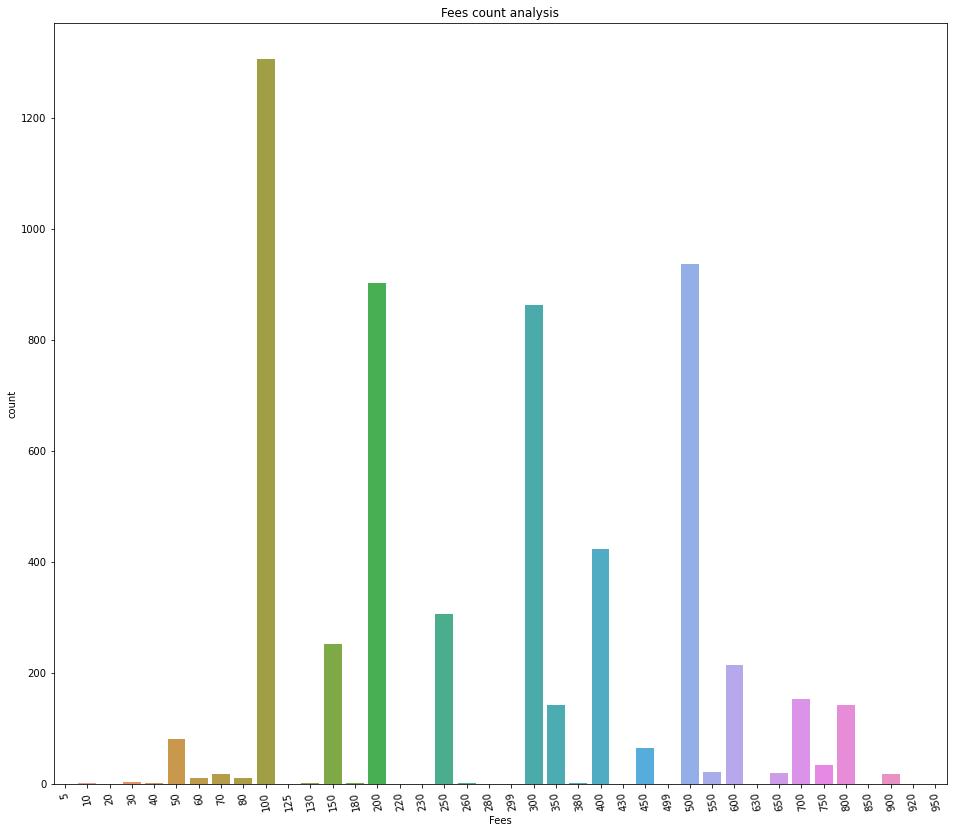

In [98]:
plt.subplots(figsize=(16,14))
sns.countplot(x='Fees',data=train_data)
plt.title("Fees count analysis")
plt.xlabel('Fees')
plt.ylabel('count')
plt.xticks(rotation=100)

plt.show()

observing fees column we can understand rs 100 is mostly charged by the doctors 2nd commonly charged fees amount is 500 and then 200,300 respectively

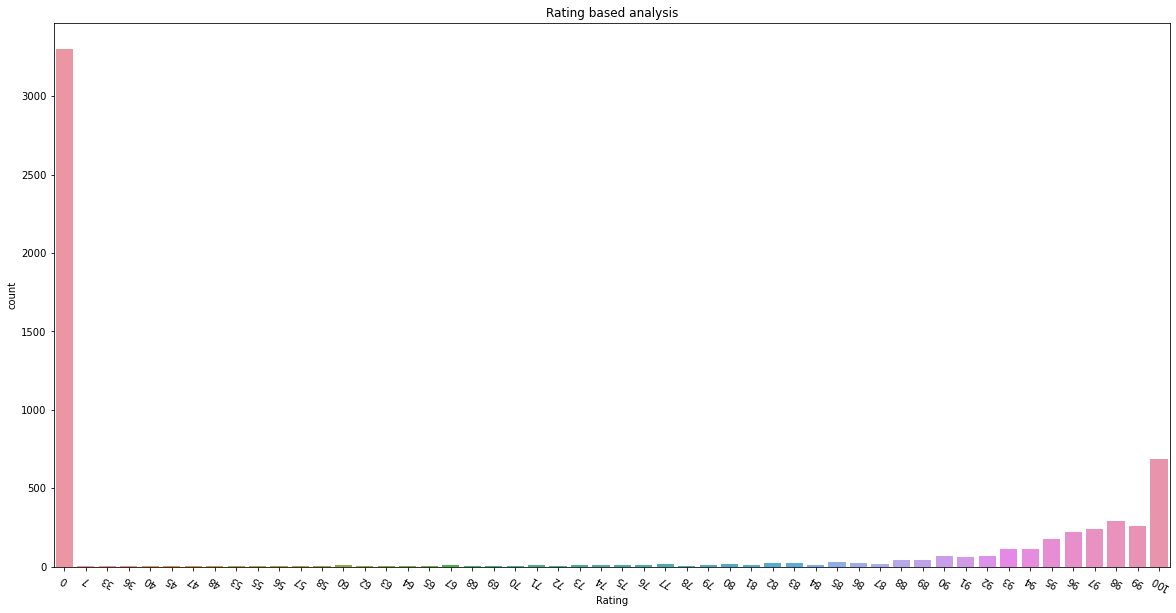

In [99]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Rating',data=train_data)
plt.title("Rating based analysis")
plt.xlabel('Rating')
plt.ylabel('count')
plt.xticks(rotation=150)

plt.show()

we have already observed in distplot about ratings but here it is clear with approximate counts above 3000 data collected has 0 rating or no ratings given while among the rated doctors 100 is most common which counts approximately 900,while 93 to 98 ratings is given to around 50 to 250 doctors is other ratings are negligable in counts 

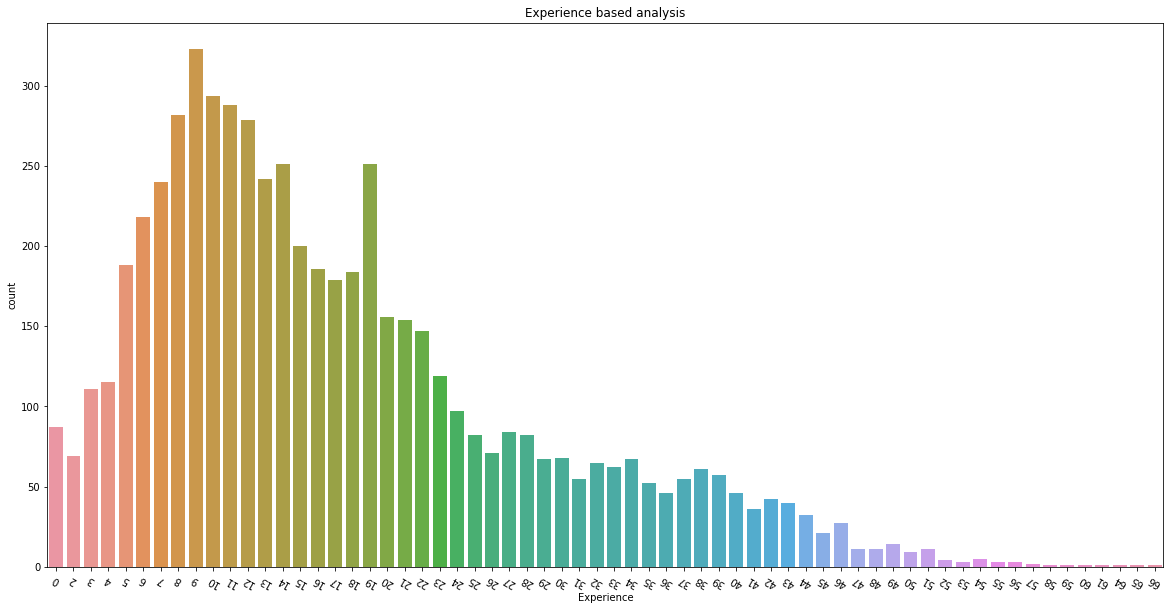

In [100]:
plt.subplots(figsize=(20,10))
sns.countplot(x='Experience',data=train_data)
plt.title("Experience based analysis")
plt.xlabel('Experience')
plt.ylabel('count')
plt.xticks(rotation=150)

plt.show()

we have got most of the doctors experience between 5 to 25 years of huch 9 & 10 years experienced doctors are most common in numbers

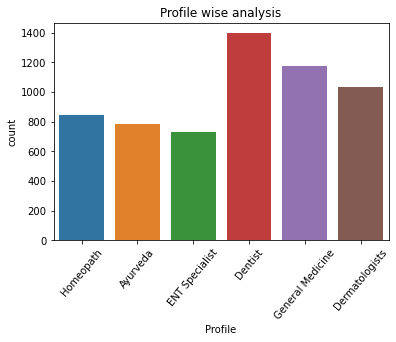

In [101]:

plt.subplots(figsize=(6,4))
sns.countplot(x='Profile',data=train_data)
plt.title("Profile wise analysis")
plt.xlabel('Profile')
plt.ylabel('count')
plt.xticks(rotation=50)

plt.show()

we already explained profle data is clean and did no further analysis, when counting the doctors in each profile we can understand dentists are more in number of around 1400 doctors
general medicine profile is held by 1200 doctors
1000-1100 doctors have dermatologist as profile
800 homeopathic doctors

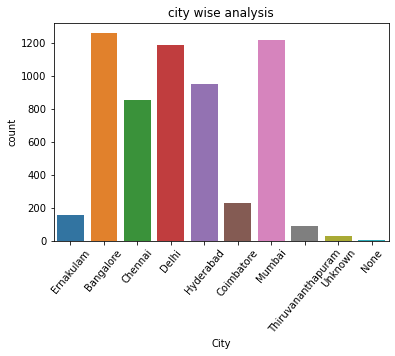

In [102]:
plt.subplots(figsize=(6,4))
sns.countplot(x='City',data=train_data)
plt.title("city wise analysis")
plt.xlabel('City')
plt.ylabel('count')
plt.xticks(rotation=50)

plt.show()

we can see highest information about doctors are from bangalore mumbai and chennai
next leading is hyderabad
hile other cities have negligable information collected

In [107]:
train_data.columns

Index(['Experience', 'Rating', 'Profile', 'Miscellaneous_Info', 'Fees', 'area',
       'City', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT',
       'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

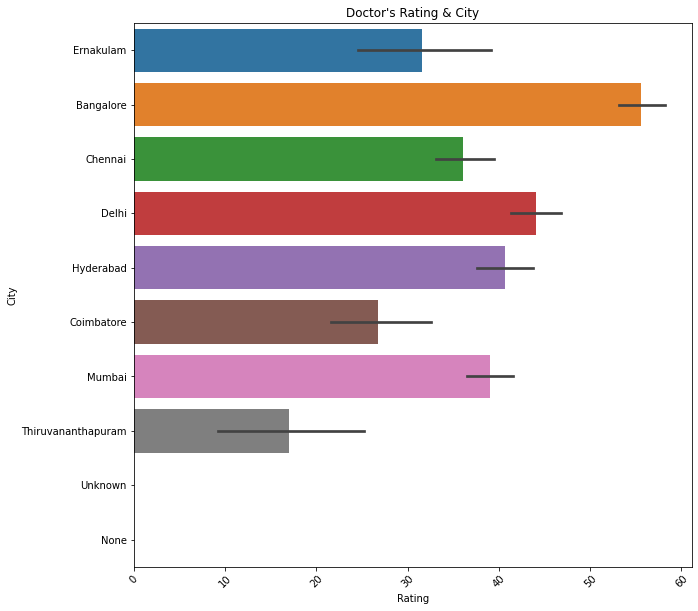

In [109]:
plt.figure(figsize=(10,10))
sns.barplot(x='Rating',y='City',data=train_data)
plt.title("Doctor's Rating & City")
plt.xticks(rotation=45)
plt.show()

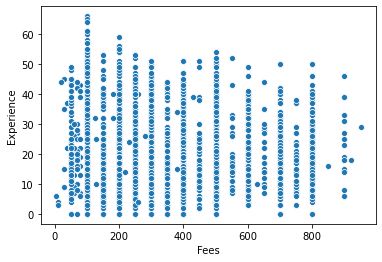

In [105]:
sns.scatterplot(x='Fees',y='Experience',data=train_data)

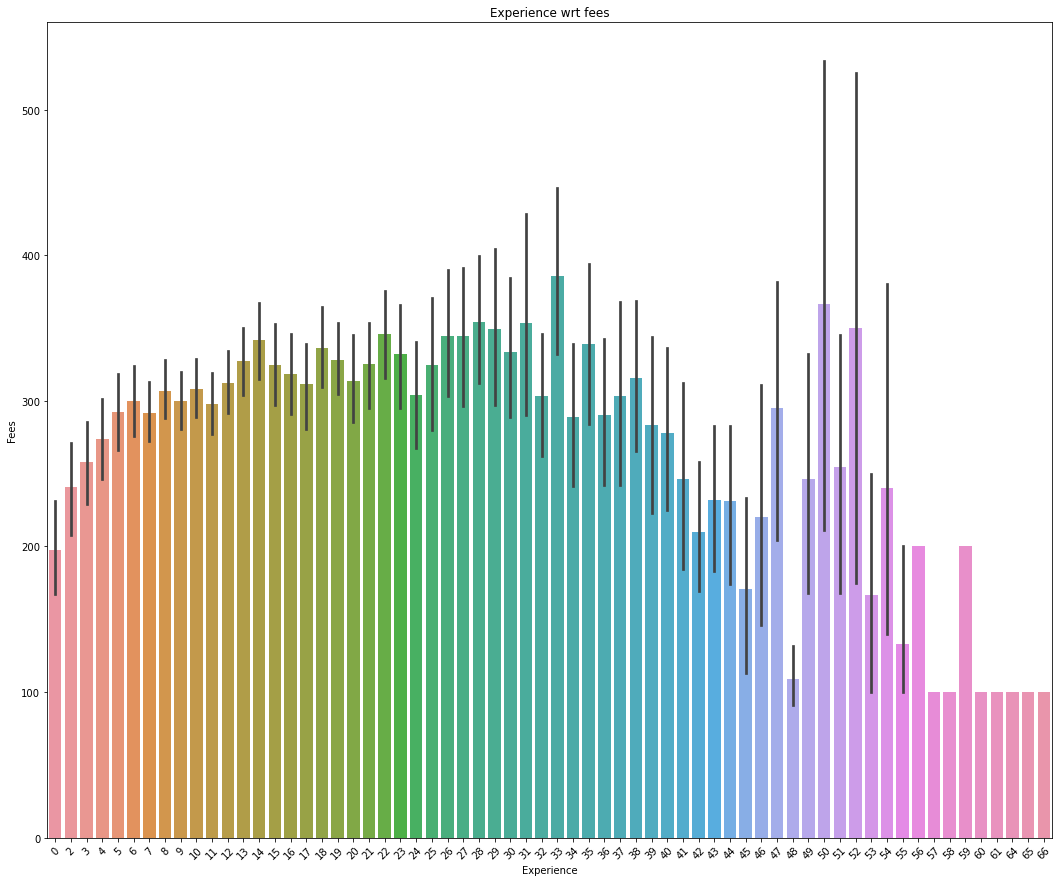

In [110]:
plt.figure(figsize=(18,15))
sns.barplot(x='Experience',y='Fees',data=train_data)
plt.title("Experience wrt fees")
plt.xticks(rotation=45)
plt.show()

their has been misconception that highest experienced doctors would charge highest fees but we can see doctors ith highest experience is charging 100-150 

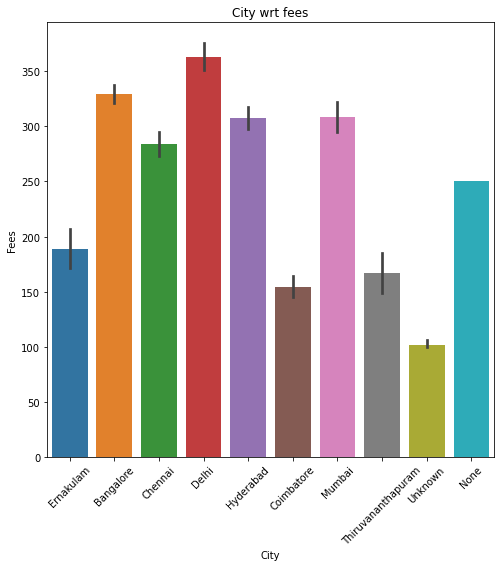

In [111]:
plt.figure(figsize=(8,8))
sns.barplot(x='City',y='Fees',data=train_data)
plt.title("City wrt fees")
plt.xticks(rotation=45)
plt.show()

city wise the fee distribution explains delhi charges highest fee,350-400
bangalore 300-350
mumba and hyderabad approximately 300

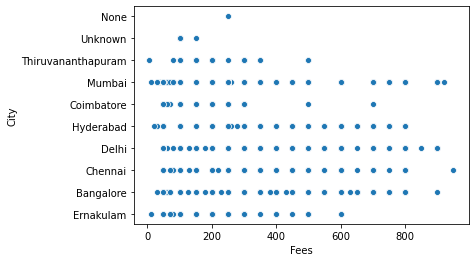

In [112]:
sns.scatterplot(x='Fees',y='City',data=train_data)

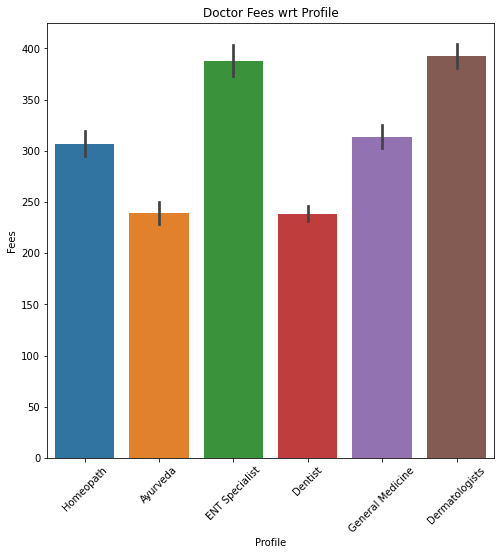

In [113]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=train_data)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

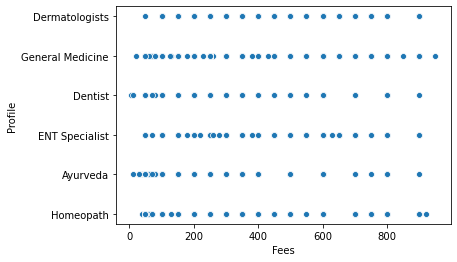

In [114]:
sns.scatterplot(x='Fees',y='Profile',data=train_data)

on the basis profile dermatologist is charging high followed by ENT
while GENERAL MEDICINE AND HOMEOPATH charge between 300-350 being second highest

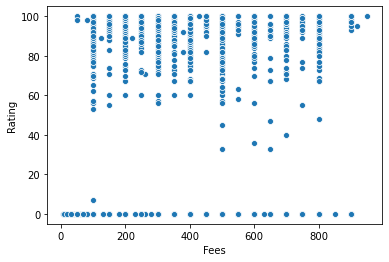

In [115]:
sns.scatterplot(x='Fees',y='Rating',data=train_data)

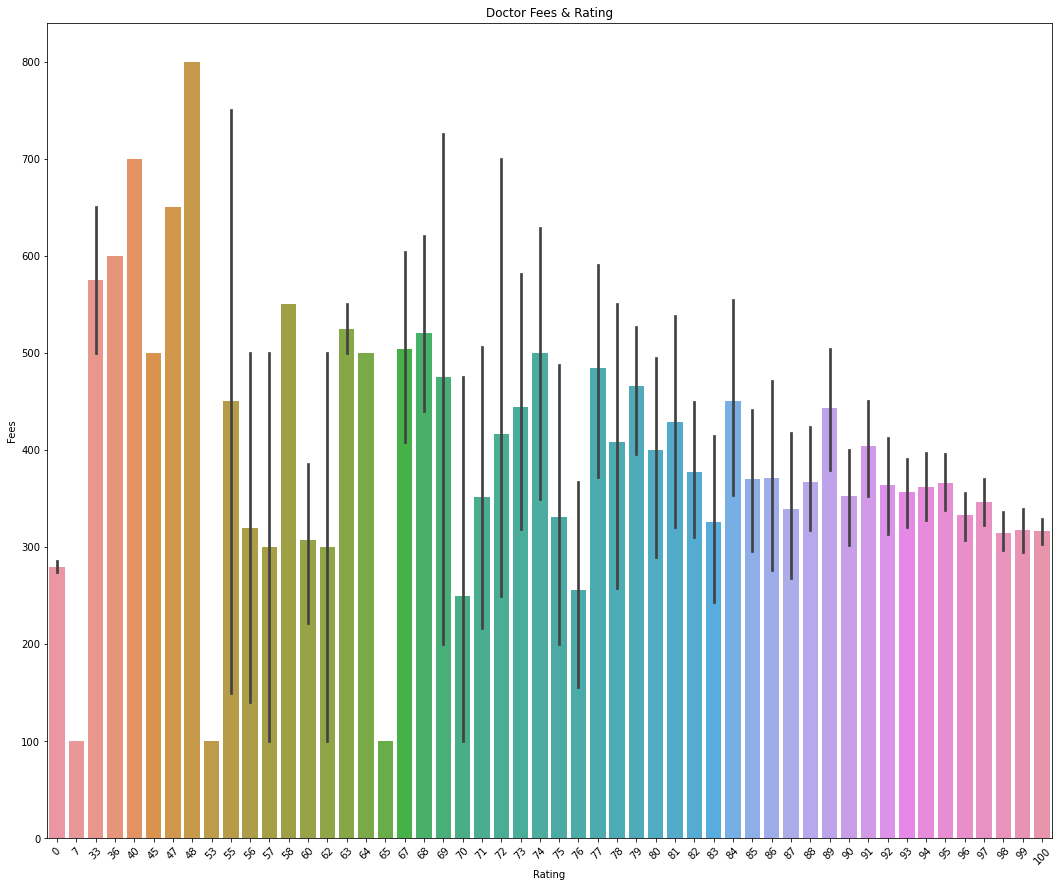

In [116]:
plt.figure(figsize=(18,15))
sns.barplot(x='Rating',y='Fees',data=train_data)
plt.title("Doctor Fees & Rating")
plt.xticks(rotation=45)
plt.show()

we can see 100% rating doctors isnt charging highest but 40-50 % rated doctors are chraging 600-800 fees

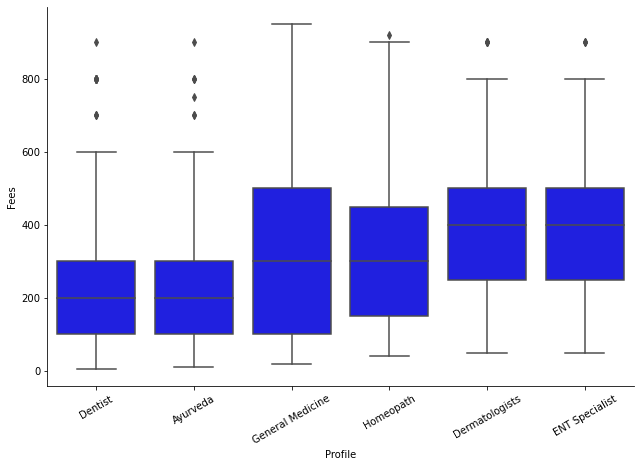

In [117]:
sns.catplot(x='Profile',y='Fees', data=train_data.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='b')
plt.xticks(rotation=30)
plt.show()

we can see dentist and ayurveda has too many outliers on profile base while homeopath,dermatologists and ENT doctors have few

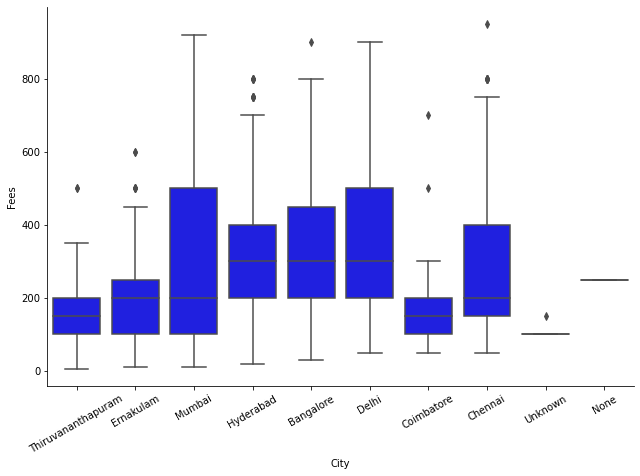

In [118]:
sns.catplot(x='City',y='Fees', data=train_data.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='b')
plt.xticks(rotation=30)
plt.show()

citiy wise outliers are found in information of ernakulum,hyderabad,coimbatore and chehnnai

SUMMARY STATISTICS

In [120]:
train_data

,Experience,Rating,Profile,Miscellaneous_Info,Fees,area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,1,0,0,0,0,1,0,0,0,0
5957,33,0,General Medicine,NaN,100,Nungambakkam,Chennai,1,0,0,0,0,0,0,0,0,0
5958,41,97,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,1,0,0,0,0,0,0,0,0,0
5959,15,90,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,1,0,0,0,0,0,0,1,0,0


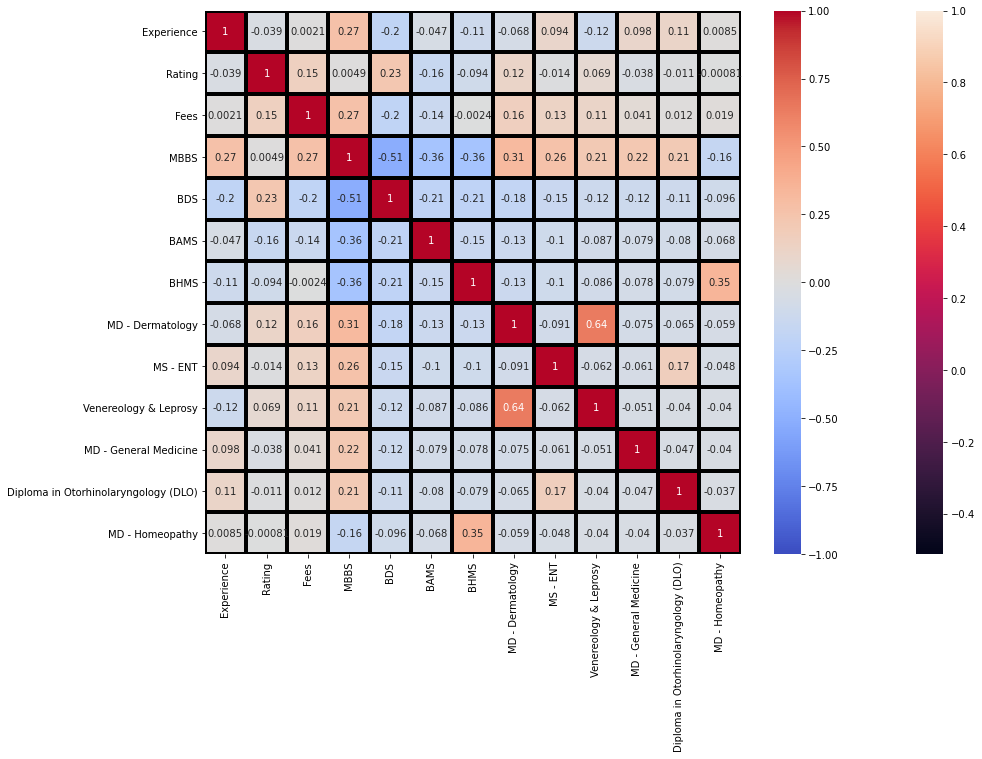

In [122]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_data.corr())
sns.heatmap(train_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

Text(0.5, 1.0, 'correlation with target variables')

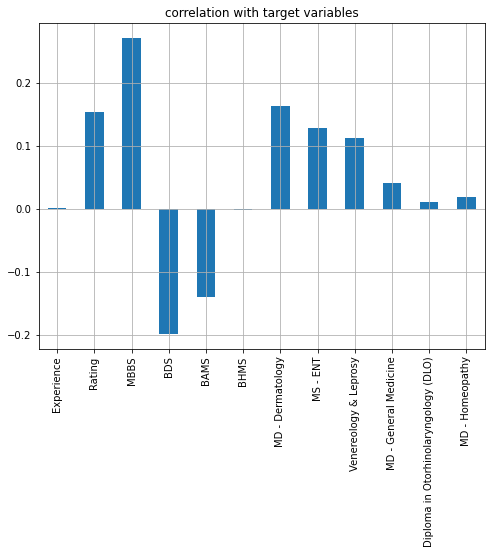

In [123]:
plt.figure(figsize=(8,6))
train_data.drop('Fees',axis=1).corrwith(train_data['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("correlation with target variables")

correlation of fees wirth other attributes are as below:
MBBS has  comparitively highest positivecorrelation of 27%
16% positive coorelation is with dermatologist
13% ENT &
11% with venereoogy and leprosy

negative correlation with fee is found with BDS and BAMS WITH -14% AND -2.4% RESPECTIVELY

In [124]:
train_data=train_data.drop(['Miscellaneous_Info'], axis = 1)


CHECKING SKEWNESS

In [125]:
train_data.skew()

Experience                              0.991089
Rating                                  0.247186
Fees                                    0.751870
MBBS                                    0.118000
BDS                                     1.293695
BAMS                                    2.229777
BHMS                                    2.261706
MD - Dermatology                        2.639954
MS - ENT                                3.403459
Venereology & Leprosy                   4.171950
MD - General Medicine                   4.239699
Diploma in Otorhinolaryngology (DLO)    4.581912
MD - Homeopathy                         5.475409
dtype: float64

In [126]:
train_data.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'area', 'City', 'MBBS',
       'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT',
       'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

In [127]:
train_data.isnull().sum()

Experience                              0
Rating                                  0
Profile                                 0
Fees                                    0
area                                    0
City                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

In [128]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in train_data.columns:
    if train_data[column].dtype==np.number:
        continue
        train_data[column]=le.fit_transform(train_data[column])

In [129]:
train_data

,Experience,Rating,Profile,Fees,area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,300,Basavanagudi,Bangalore,1,0,0,0,0,1,0,0,0,0
5957,33,0,General Medicine,100,Nungambakkam,Chennai,1,0,0,0,0,0,0,0,0,0
5958,41,97,General Medicine,600,Greater Kailash Part 2,Delhi,1,0,0,0,0,0,0,0,0,0
5959,15,90,General Medicine,100,Vileparle West,Mumbai,1,0,0,0,0,0,0,1,0,0


In [130]:
train_data = pd.get_dummies(train_data,columns=['City','Profile'], prefix=['City','Profile'])


In [131]:
train_data=train_data.drop(['Miscellaneous_Info'], axis = 1)
test_data=test_data.drop(['Miscellaneous_Info'], axis = 1)


KeyError: "['Miscellaneous_Info'] not found in axis"

In [132]:
train_data=train_data.drop(['area'], axis = 1)
test_data=test_data.drop(['area'], axis = 1)


In [133]:
train_data

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_Mumbai,City_None,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,98,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,100,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,300,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,97,600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,90,100,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [134]:
train_data.skew()

Experience                               0.991089
Rating                                   0.247186
Fees                                     0.751870
MBBS                                     0.118000
BDS                                      1.293695
BAMS                                     2.229777
BHMS                                     2.261706
MD - Dermatology                         2.639954
MS - ENT                                 3.403459
Venereology & Leprosy                    4.171950
MD - General Medicine                    4.239699
Diploma in Otorhinolaryngology (DLO)     4.581912
MD - Homeopathy                          5.475409
City_Bangalore                           1.416677
City_Chennai                             2.035059
City_Coimbatore                          4.816241
City_Delhi                               1.509849
City_Ernakulam                           6.000437
City_Hyderabad                           1.860027
City_Mumbai                              1.465681


In [135]:
from scipy.stats import zscore
z=np.abs(zscore(train_data))
z
import warnings
warnings.filterwarnings('ignore')

In [136]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    8, ..., 5955, 5956, 5959], dtype=int64), array([12, 17, 10, ..., 12,  8, 10], dtype=int64))


In [137]:
df=train_data[(z<3).all(axis=1)]

In [138]:
df.shape, train_data.shape

((4149, 29), (5961, 29))

In [139]:
percentage_loss=((5961-4146)/5961)*100
print(percentage_loss)

30.447911424257672


we are not removing outliers as it 30% of data will be lost

FEATURE SCALING


In [140]:
x = train_data.drop('Fees',axis=1)
y = train_data['Fees']
x

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,...,City_Mumbai,City_None,City_Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,98,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,100,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,97,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,90,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [141]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.60097885,  1.22066882, -0.94275303, ..., -0.3729841 ,
        -0.49496209,  2.46397532],
       [-0.47604029,  1.17841853, -0.94275303, ..., -0.3729841 ,
        -0.49496209, -0.40584822],
       [-0.74529508, -0.89184525,  1.06072319, ...,  2.68107941,
        -0.49496209, -0.40584822],
       ...,
       [ 2.12675597,  1.15729339,  1.06072319, ..., -0.3729841 ,
         2.02035676, -0.40584822],
       [-0.20678551,  1.00941741,  1.06072319, ..., -0.3729841 ,
         2.02035676, -0.40584822],
       [-0.02728232,  1.22066882, -0.94275303, ..., -0.3729841 ,
        -0.49496209, -0.40584822]])

In [142]:
from sklearn.model_selection import train_test_split


In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)


IMPORTING MODEL LIBRARY

In [144]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

IMPORTING BOOSTING MODELS

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


IMPORTING ERROR METRICS

In [146]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score


In [147]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [148]:

for m in model:
    m.fit (x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))


score of LinearRegression() is: 0.06290841387340229
MAE: 144.71577385138139
MSE: 33390.093565706775
RMSE: 182.7295640166275
R2_score: 0.053084465487444166
score of SVR() is: 0.10064372256923648
MAE: 139.69398376242583
MSE: 32211.617192181144
RMSE: 179.4759515706245
R2_score: 0.08650508417937675
score of DecisionTreeRegressor() is: 0.7942126483701433
MAE: 170.87554582420466
MSE: 54118.87144197679
RMSE: 232.6346307882315
R2_score: -0.5347665911103598
score of KNeighborsRegressor() is: 0.3737192903223835
MAE: 141.4843252305113
MSE: 34618.38813076278
RMSE: 186.06017341377165
R2_score: 0.018251043942215883
score of Lasso() is: 0.18534197698253818
MAE: 135.66589396563984
MSE: 29347.24807720668
RMSE: 171.3103851995164
R2_score: 0.1677362315617542
score of Ridge() is: 0.18586825752557024
MAE: 135.30701234250478
MSE: 29377.321826428637
RMSE: 171.39813834003166
R2_score: 0.16688336481960908
score of ElasticNet() is: 0.17331855433092325
MAE: 138.32298278520227
MSE: 29767.536257013755
RMSE: 172.53

CROSS VALIDATION ALL ALGORITHM

In [149]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:

    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard deviation:",score.std())
    

Model: LinearRegression()
Score: [ 1.82211560e-01  1.57021353e-01  1.93536397e-01 -9.35827861e+21
  1.77609519e-01]
Mean Score: -1.8716557211811014e+21
Standard deviation: 3.743311442362203e+21
Model: SVR()
Score: [0.11509364 0.07371335 0.10746177 0.06768669 0.10200346]
Mean Score: 0.09319178026329404
Standard deviation: 0.018925583880883206
Model: DecisionTreeRegressor()
Score: [-0.48274525 -0.49608557 -0.46579392 -0.5151218  -0.37855007]
Mean Score: -0.46765932291304607
Standard deviation: 0.047396756731461695
Model: KNeighborsRegressor()
Score: [0.0157468  0.06579142 0.04013267 0.05828022 0.06626419]
Mean Score: 0.04924306032933394
Standard deviation: 0.019236609427365044
Model: Lasso()
Score: [0.1886003  0.15819978 0.19356221 0.16005253 0.17759889]
Mean Score: 0.1756027436378687
Standard deviation: 0.014423147033854784
Model: Ridge()
Score: [0.18681402 0.15798479 0.19305701 0.15986226 0.17750962]
Mean Score: 0.1750455394335486
Standard deviation: 0.014075389623760284
Model: Elastic

In [150]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 100}


In [151]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=100)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_gbr=gbr.predict(x_test)

gbrs=r2_score(y_test,pred_gbr)
print('R2 Score:',gbrs*100)

gbrscore=cross_val_score(gbr,x,y,cv=5)
gbrc=gbrscore.mean()
print('cross val score:',gbrc*100)

R2 Score: 19.430140924711193
cross val score: 19.47827399668328


In [152]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_gbr))
print('MeanSquaredError:',mean_squared_error(y_test,pred_gbr))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

Error:-
MeanAbsoluteError: 133.17142342229195
MeanSquaredError: 28410.50796029612
RootMeanSquareError: 168.55416921659375


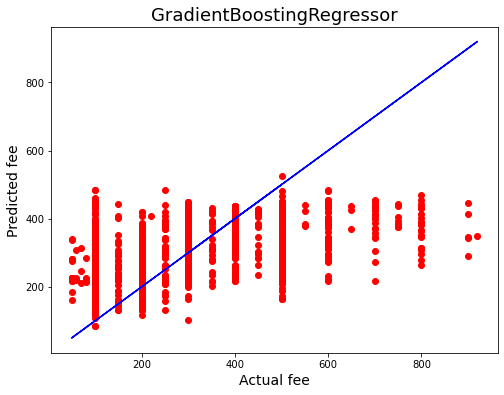

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_gbr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual fee",fontsize=14)
plt.ylabel("Predicted fee",fontsize=14)
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

Gradientboosting regressor is giving best score and r2 score

In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
parameters={'loss':['lad','huber','quantile'],'n_estimators':[100,200,300],'criterion':['mse','mae','friedman_mse'],'random_state':[10,20,30,40]}

In [ ]:
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x,y)
print(clf.best_params_)



In [ ]:
parameters={'criterion':['mse','mae','friedman_mse','poisson'],'splitter':['best','random'],'max_depth':[4,6,8,10],'random_state':[10,20,30,40]}
from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

In [1824]:
parameters={'n_estimators':[100,200,300],'max_depth':[10,40,60],'min_samples_split':[2,5,10]}

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

Final accuracy: 16.479829338875895


<bound method BaseSearchCV.fit of GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse', 'poisson'],
                         'max_depth': [4, 6, 8, 10],
                         'random_state': [10, 20, 30, 40],
                         'splitter': ['best', 'random']})>

SAVING THE MODEL

In [1828]:
import pickle
filename='DoctorFeePrediction.csv.pkl'

In [1829]:
pickle.dump(dt,open(filename,'wb'))

CONCLUSION

In [2]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gbr.predict(x_test))

NameError: name 'y_test' is not defined